# 1️⃣ Importación de Librerías

In [111]:
# Librerías básicas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Preprocesamiento
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# Modelos supervisados
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Modelos no supervisados
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Métricas
from sklearn.metrics import (
    accuracy_score, 
    classification_report, 
    confusion_matrix,
    silhouette_score,
    ConfusionMatrixDisplay
)

# Configuración de visualización
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

print("✅ Librerías importadas correctamente")

✅ Librerías importadas correctamente


# 2️⃣ Carga y Exploración de Datos

In [112]:
# Cargar el dataset
df = pd.read_csv('academic_performance_master.csv')

print("="*70)
print("📂 INFORMACIÓN DEL DATASET")
print("="*70)
print(f"\n📊 Dimensiones: {df.shape[0]} filas × {df.shape[1]} columnas")
print(f"\n🔍 Primeras 5 filas:")
df.head()

📂 INFORMACIÓN DEL DATASET

📊 Dimensiones: 46417 filas × 15 columnas

🔍 Primeras 5 filas:


,Periodo,Paralelo,Identificacion_Estudiante,Estudiante,Carrera,Nivel,Asignatura,Num_matricula,Asistencia,Nota_final,Estado_Asignatura,Estado_Matricula,Tipo_Ingreso,Cedula_docente,Nombre_docente
0,2020-2P,L,0107271306,AGUAYZA RODAS KEVIN MATEO,TAF-TECNOLOGIA SUPERIOR EN ASESORIA FINANCIERA,PRIMERO,TAF-116-ATENCIÓN AL CLIENTE,1,82.0,7.4,APROBADO,APROBADO,NORMAL,105003198.0,VERONICA MARIBEL OCHOA CALDERON
1,2020-2P,L,0107271306,AGUAYZA RODAS KEVIN MATEO,TAF-TECNOLOGIA SUPERIOR EN ASESORIA FINANCIERA,PRIMERO,TAF-117-COMUNICACIÓN ORAL Y ESCRITA,1,82.0,7.3,APROBADO,APROBADO,NORMAL,104549159.0,JAIME GEOVANY LOJA BUESTAN
2,2020-2P,L,0107271306,AGUAYZA RODAS KEVIN MATEO,TAF-TECNOLOGIA SUPERIOR EN ASESORIA FINANCIERA,PRIMERO,TAF-114-MANEJO DE CUENTAS,1,100.0,7.8,APROBADO,APROBADO,NORMAL,103280152.0,NORMA ELIZABETH VELECELA ABAMBARI
3,2020-2P,L,0107271306,AGUAYZA RODAS KEVIN MATEO,TAF-TECNOLOGIA SUPERIOR EN ASESORIA FINANCIERA,PRIMERO,TAF-113-MARCO ECONÓMICO,1,100.0,8.1,APROBADO,APROBADO,NORMAL,103970851.0,MONICA ELIZABETH COBOS ROJAS
4,2020-2P,L,0107271306,AGUAYZA RODAS KEVIN MATEO,TAF-TECNOLOGIA SUPERIOR EN ASESORIA FINANCIERA,PRIMERO,TAF-112-MARCO JURÍDICO DEL SECTOR FINANCIERO E...,1,100.0,8.1,APROBADO,APROBADO,NORMAL,103924692.0,MARCO PATRICIO SAMANIEGO DUMAS


In [113]:
# Información general del dataset
print("\n📋 Información de Columnas:")
df.info()


📋 Información de Columnas:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46417 entries, 0 to 46416
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Periodo                    46417 non-null  object 
 1   Paralelo                   43980 non-null  object 
 2   Identificacion_Estudiante  46417 non-null  object 
 3   Estudiante                 46417 non-null  object 
 4   Carrera                    46417 non-null  object 
 5   Nivel                      46417 non-null  object 
 6   Asignatura                 46417 non-null  object 
 7   Num_matricula              46417 non-null  int64  
 8   Asistencia                 44915 non-null  float64
 9   Nota_final                 46417 non-null  float64
 10  Estado_Asignatura          46417 non-null  object 
 11  Estado_Matricula           46417 non-null  object 
 12  Tipo_Ingreso               46417 non-null  object 
 13  Cedula_docente    

In [114]:
# Estadísticas descriptivas
print("\n📈 Estadísticas Descriptivas:")
df.describe()


📈 Estadísticas Descriptivas:


,Num_matricula,Asistencia,Nota_final,Cedula_docente
count,46417.000000,44915.000000,46417.000000,4.398000e+04
mean,1.032510,92.322793,7.903696,2.130524e+08
std,0.186932,19.976083,2.155291,2.700983e+08
min,1.000000,-37.500000,0.000000,1.016854e+08
25%,1.000000,94.440000,7.500000,1.038001e+08
50%,1.000000,100.000000,8.400000,1.045492e+08
75%,1.000000,100.000000,9.150000,1.075995e+08
max,3.000000,102.980000,10.000000,1.802155e+09


In [115]:
# Verificar valores nulos
print("\n❓ Valores Nulos por Columna:")
null_counts = df.isnull().sum()
null_percentage = (null_counts / len(df)) * 100

null_df = pd.DataFrame({
    'Valores Nulos': null_counts,
    'Porcentaje (%)': null_percentage
})
print(null_df[null_df['Valores Nulos'] > 0])


❓ Valores Nulos por Columna:
                Valores Nulos  Porcentaje (%)
Paralelo                 2437        5.250232
Asistencia               1502        3.235883
Cedula_docente           2437        5.250232
                Valores Nulos  Porcentaje (%)
Paralelo                 2437        5.250232
Asistencia               1502        3.235883
Cedula_docente           2437        5.250232



🎯 Distribución de Estado_Asignatura:
Estado_Asignatura
APROBADO        41682
REPROBADO        3897
DESERTOR          720
RETIRADO          115
RECUPERACIÓN        2
SIN NOTAS           1
Name: count, dtype: int64


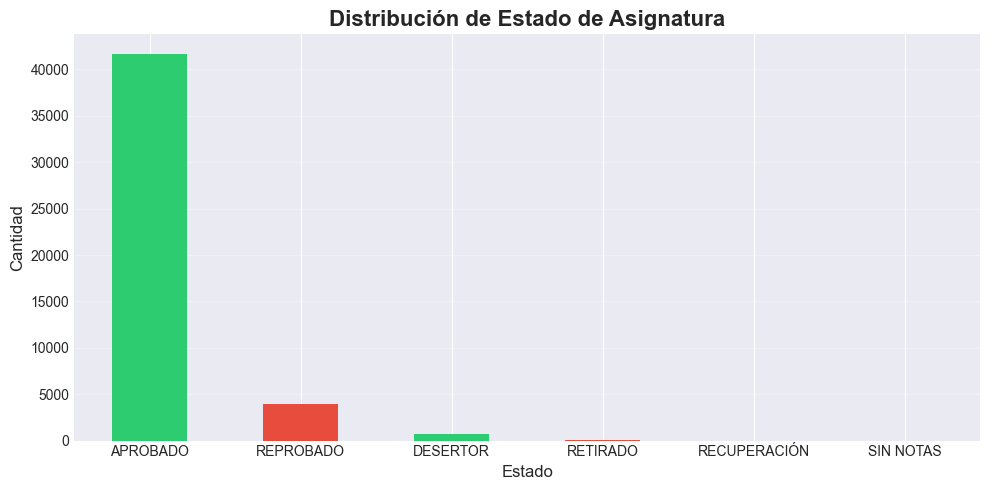


📊 Proporción de Aprobados: 89.80%


In [116]:
# Distribución de la variable objetivo
print("\n🎯 Distribución de Estado_Asignatura:")
estado_counts = df['Estado_Asignatura'].value_counts()
print(estado_counts)

# Visualizar
plt.figure(figsize=(10, 5))
estado_counts.plot(kind='bar', color=['#2ecc71', '#e74c3c'])
plt.title('Distribución de Estado de Asignatura', fontsize=16, fontweight='bold')
plt.xlabel('Estado', fontsize=12)
plt.ylabel('Cantidad', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\n📊 Proporción de Aprobados: {(estado_counts['APROBADO'] / estado_counts.sum()) * 100:.2f}%")

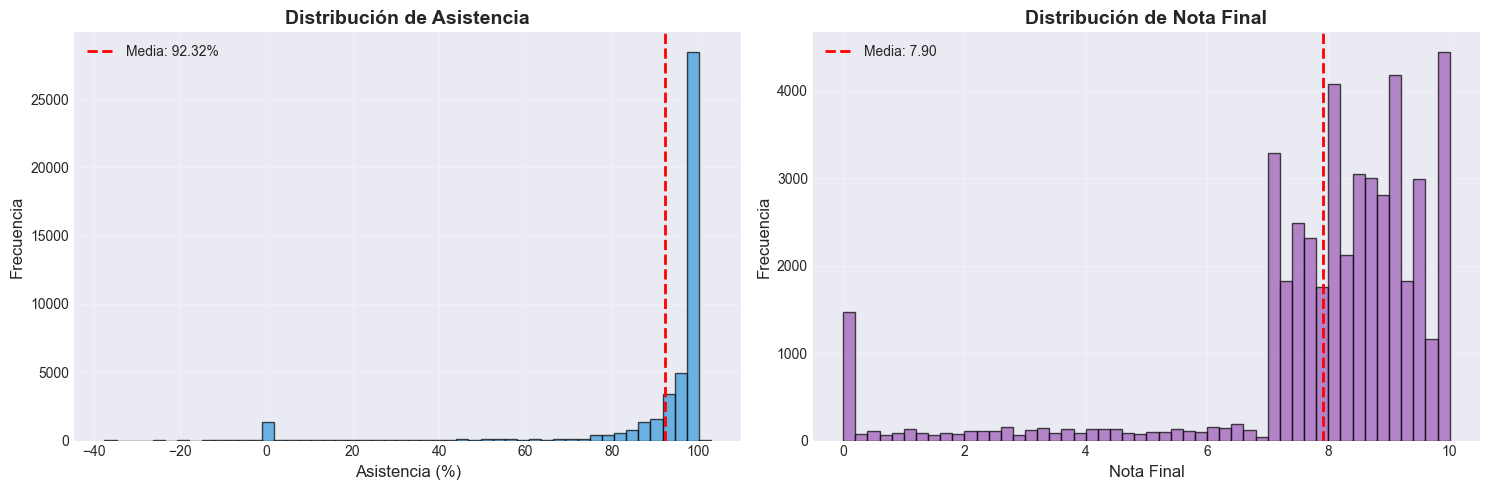

In [117]:
# Distribución de variables numéricas clave
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Asistencia
axes[0].hist(df['Asistencia'].dropna(), bins=50, color='#3498db', edgecolor='black', alpha=0.7)
axes[0].set_title('Distribución de Asistencia', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Asistencia (%)', fontsize=12)
axes[0].set_ylabel('Frecuencia', fontsize=12)
axes[0].axvline(df['Asistencia'].mean(), color='red', linestyle='--', linewidth=2, label=f'Media: {df["Asistencia"].mean():.2f}%')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Nota Final
axes[1].hist(df['Nota_final'].dropna(), bins=50, color='#9b59b6', edgecolor='black', alpha=0.7)
axes[1].set_title('Distribución de Nota Final', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Nota Final', fontsize=12)
axes[1].set_ylabel('Frecuencia', fontsize=12)
axes[1].axvline(df['Nota_final'].mean(), color='red', linestyle='--', linewidth=2, label=f'Media: {df["Nota_final"].mean():.2f}')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

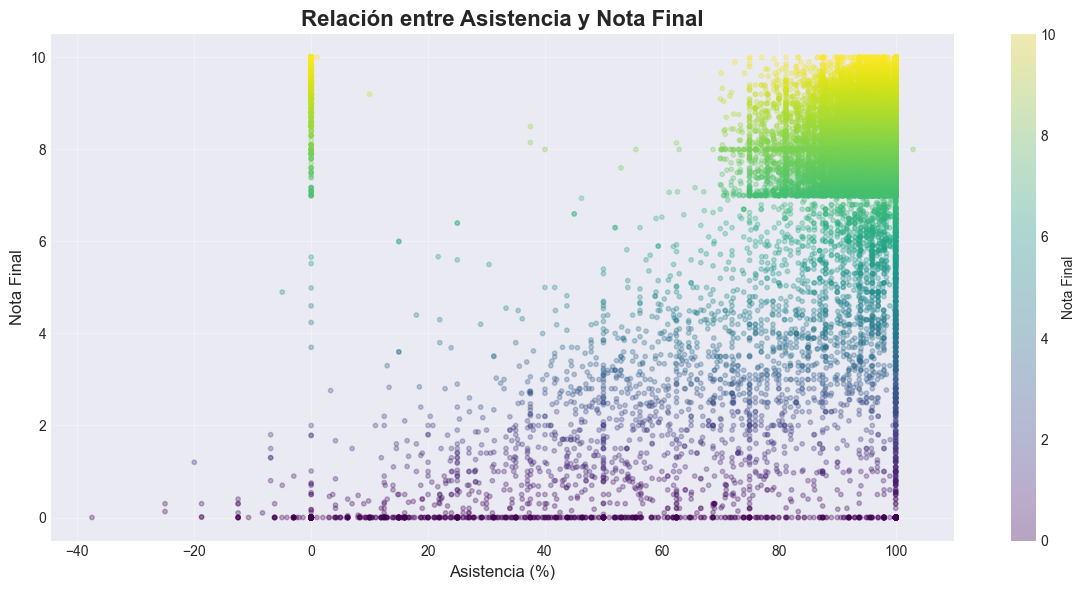


🔗 Correlación Asistencia-Nota Final: 0.5462


In [118]:
# Relación entre Asistencia y Nota Final
plt.figure(figsize=(12, 6))
plt.scatter(df['Asistencia'], df['Nota_final'], alpha=0.3, c=df['Nota_final'], cmap='viridis', s=10)
plt.colorbar(label='Nota Final')
plt.title('Relación entre Asistencia y Nota Final', fontsize=16, fontweight='bold')
plt.xlabel('Asistencia (%)', fontsize=12)
plt.ylabel('Nota Final', fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Calcular correlación
correlation = df[['Asistencia', 'Nota_final']].corr().iloc[0, 1]
print(f"\n🔗 Correlación Asistencia-Nota Final: {correlation:.4f}")

# 3️⃣ Preparación del Dataset

In [119]:
# Seleccionar columnas relevantes
columnas_relevantes = [
    'Identificacion_Estudiante',
    'Estudiante',
    'Nivel',
    'Asignatura',
    'Num_matricula',
    'Asistencia',
    'Nota_final',
    'Estado_Asignatura'
]

df_clean = df[columnas_relevantes].copy()
print(f"✅ Dataset filtrado: {len(columnas_relevantes)} columnas seleccionadas")

✅ Dataset filtrado: 8 columnas seleccionadas


In [120]:
# Eliminar filas con valores nulos en columnas críticas
filas_antes = len(df_clean)
df_clean.dropna(subset=['Asistencia', 'Nota_final', 'Estado_Asignatura'], inplace=True)
filas_despues = len(df_clean)

print(f"🧹 Limpieza de datos:")
print(f"   - Filas antes: {filas_antes}")
print(f"   - Filas después: {filas_despues}")
print(f"   - Filas eliminadas: {filas_antes - filas_despues}")

🧹 Limpieza de datos:
   - Filas antes: 46417
   - Filas después: 44915
   - Filas eliminadas: 1502


In [121]:
# Corregir valores anómalos
df_clean['Asistencia'] = df_clean['Asistencia'].clip(lower=0, upper=100)
df_clean['Nota_final'] = df_clean['Nota_final'].clip(lower=0, upper=10)

print("✅ Valores anómalos corregidos:")
print(f"   - Asistencia: rango [0, 100]")
print(f"   - Nota_final: rango [0, 10]")

✅ Valores anómalos corregidos:
   - Asistencia: rango [0, 100]
   - Nota_final: rango [0, 10]


In [122]:
# Crear variable objetivo: 1 = Aprobado, 0 = Reprobado
df_clean['Aprobado'] = (df_clean['Estado_Asignatura'] == 'APROBADO').astype(int)

print("🎯 Variable Objetivo Creada:")
print(f"   - Aprobados (1): {df_clean['Aprobado'].sum()}")
print(f"   - Reprobados (0): {(df_clean['Aprobado'] == 0).sum()}")
print(f"   - Proporción de aprobados: {df_clean['Aprobado'].mean()*100:.2f}%")

🎯 Variable Objetivo Creada:
   - Aprobados (1): 40210
   - Reprobados (0): 4705
   - Proporción de aprobados: 89.52%


In [123]:
# Codificar variable categórica: Nivel
le_nivel = LabelEncoder()
df_clean['Nivel_encoded'] = le_nivel.fit_transform(df_clean['Nivel'].astype(str))

print("🔢 Codificación de Nivel:")
print(f"   - Categorías únicas: {len(le_nivel.classes_)}")
print(f"   - Clases: {list(le_nivel.classes_)}")

🔢 Codificación de Nivel:
   - Categorías únicas: 6
   - Clases: ['CUARTO', 'PRIMERO', 'QUINTO', 'SEGUNDO', 'SEXTO', 'TERCERO']


# 4️⃣ Modelo Supervisado - Clasificación

## 📌 Objetivo
Predecir si un estudiante **aprobará** o **reprobará** una asignatura basándose en:
- Asistencia
- Número de matrícula
- Nivel académico

In [124]:
# Preparar características y variable objetivo
feature_columns = ['Asistencia', 'Num_matricula', 'Nivel_encoded']
X = df_clean[feature_columns].values
y = df_clean['Aprobado'].values

print("📊 Datos para Modelo Supervisado:")
print(f"   - Forma de X: {X.shape}")
print(f"   - Forma de y: {y.shape}")
print(f"   - Características: {feature_columns}")

📊 Datos para Modelo Supervisado:
   - Forma de X: (44915, 3)
   - Forma de y: (44915,)
   - Características: ['Asistencia', 'Num_matricula', 'Nivel_encoded']


In [125]:
# Escalar características
scaler_supervised = StandardScaler()
X_scaled = scaler_supervised.fit_transform(X)

print("✅ Datos escalados con StandardScaler")
print(f"\nEstadísticas después del escalado:")
print(pd.DataFrame(X_scaled, columns=feature_columns).describe())

✅ Datos escalados con StandardScaler

Estadísticas después del escalado:
         Asistencia  Num_matricula  Nivel_encoded
count  4.491500e+04   4.491500e+04   4.491500e+04
mean  -1.265578e-17   9.998063e-17  -1.214955e-16
std    1.000011e+00   1.000011e+00   1.000011e+00
min   -4.633188e+00  -1.768868e-01  -1.364897e+00
25%    1.057685e-01  -1.768868e-01  -7.690383e-01
50%    3.847668e-01  -1.768868e-01  -1.731792e-01
75%    3.847668e-01  -1.768868e-01   4.226799e-01
max    3.847668e-01   1.035310e+01   1.614398e+00


In [126]:
# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.25, random_state=42, stratify=y
)

print("✂️ División de Datos:")
print(f"   - Entrenamiento: {X_train.shape[0]} muestras ({(X_train.shape[0]/len(X))*100:.1f}%)")
print(f"   - Prueba: {X_test.shape[0]} muestras ({(X_test.shape[0]/len(X))*100:.1f}%)")
print(f"\n   Balance en Entrenamiento:")
print(f"      · Aprobados: {np.sum(y_train == 1)}")
print(f"      · Reprobados: {np.sum(y_train == 0)}")
print(f"\n   Balance en Prueba:")
print(f"      · Aprobados: {np.sum(y_test == 1)}")
print(f"      · Reprobados: {np.sum(y_test == 0)}")

✂️ División de Datos:
   - Entrenamiento: 33686 muestras (75.0%)
   - Prueba: 11229 muestras (25.0%)

   Balance en Entrenamiento:
      · Aprobados: 30157
      · Reprobados: 3529

   Balance en Prueba:
      · Aprobados: 10053
      · Reprobados: 1176


## 🤖 Entrenamiento de Modelos

Probaremos tres algoritmos de clasificación:
1. **Regresión Logística** (modelo lineal)
2. **Árbol de Decisión** (modelo no lineal)
3. **Random Forest** (ensemble)

In [127]:
# 1. Regresión Logística
print("="*70)
print("🔵 REGRESIÓN LOGÍSTICA")
print("="*70)

model_lr = LogisticRegression(random_state=42, max_iter=1000)
model_lr.fit(X_train, y_train)

# Predicciones
y_pred_lr = model_lr.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)

print(f"\n✅ Modelo entrenado")
print(f"📊 Accuracy: {accuracy_lr:.4f} ({accuracy_lr*100:.2f}%)")

🔵 REGRESIÓN LOGÍSTICA

✅ Modelo entrenado
📊 Accuracy: 0.9105 (91.05%)


In [128]:
# 2. Árbol de Decisión
print("="*70)
print("🌳 ÁRBOL DE DECISIÓN")
print("="*70)

model_dt = DecisionTreeClassifier(random_state=42, max_depth=10)
model_dt.fit(X_train, y_train)

# Predicciones
y_pred_dt = model_dt.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)

print(f"\n✅ Modelo entrenado")
print(f"📊 Accuracy: {accuracy_dt:.4f} ({accuracy_dt*100:.2f}%)")

🌳 ÁRBOL DE DECISIÓN

✅ Modelo entrenado
📊 Accuracy: 0.9331 (93.31%)


In [129]:
# 3. Random Forest
print("="*70)
print("🌲 RANDOM FOREST")
print("="*70)

model_rf = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=15)
model_rf.fit(X_train, y_train)

# Predicciones
y_pred_rf = model_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

print(f"\n✅ Modelo entrenado")
print(f"📊 Accuracy: {accuracy_rf:.4f} ({accuracy_rf*100:.2f}%)")

🌲 RANDOM FOREST

✅ Modelo entrenado
📊 Accuracy: 0.9324 (93.24%)

✅ Modelo entrenado
📊 Accuracy: 0.9324 (93.24%)


📊 COMPARACIÓN DE MODELOS SUPERVISADOS
             Modelo  Accuracy  Accuracy (%)
Regresión Logística  0.910500     91.049960
  Árbol de Decisión  0.933120     93.311960
      Random Forest  0.932407     93.240716


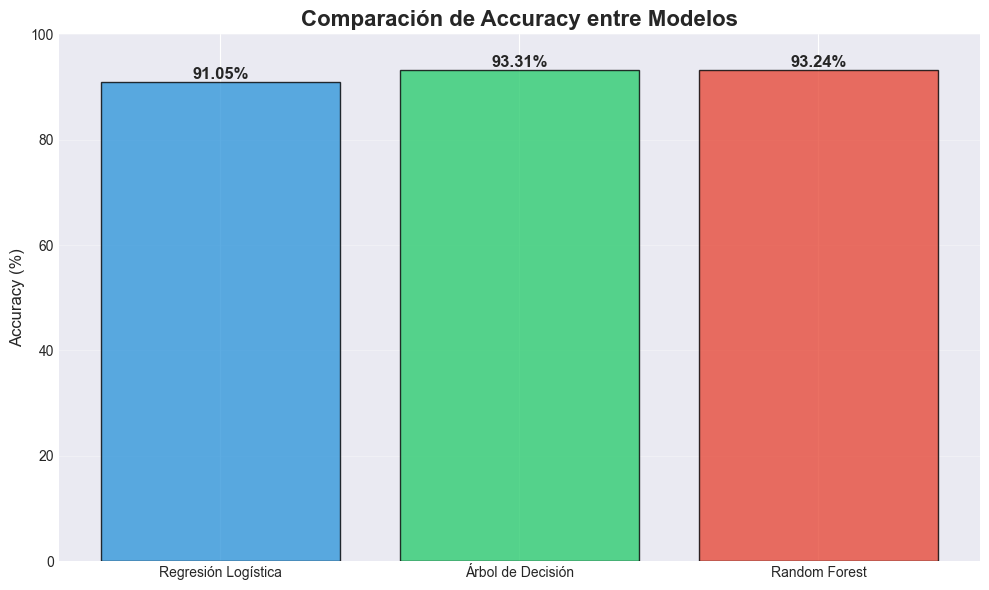


🏆 Mejor Modelo: Árbol de Decisión (Accuracy: 93.31%)


In [130]:
# Comparación de modelos
print("="*70)
print("📊 COMPARACIÓN DE MODELOS SUPERVISADOS")
print("="*70)

resultados = pd.DataFrame({
    'Modelo': ['Regresión Logística', 'Árbol de Decisión', 'Random Forest'],
    'Accuracy': [accuracy_lr, accuracy_dt, accuracy_rf],
    'Accuracy (%)': [accuracy_lr*100, accuracy_dt*100, accuracy_rf*100]
})

print(resultados.to_string(index=False))

# Visualizar
plt.figure(figsize=(10, 6))
bars = plt.bar(resultados['Modelo'], resultados['Accuracy (%)'], 
               color=['#3498db', '#2ecc71', '#e74c3c'], edgecolor='black', alpha=0.8)
plt.title('Comparación de Accuracy entre Modelos', fontsize=16, fontweight='bold')
plt.ylabel('Accuracy (%)', fontsize=12)
plt.ylim(0, 100)
plt.grid(axis='y', alpha=0.3)

# Agregar valores sobre las barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2f}%', ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

# Mejor modelo
mejor_modelo_nombre = resultados.loc[resultados['Accuracy'].idxmax(), 'Modelo']
mejor_accuracy = resultados['Accuracy'].max()
print(f"\n🏆 Mejor Modelo: {mejor_modelo_nombre} (Accuracy: {mejor_accuracy*100:.2f}%)")

## 📊 Análisis Detallado del Mejor Modelo

In [131]:
# Seleccionar el mejor modelo (Árbol de Decisión)
best_model = model_dt
y_pred_best = y_pred_dt

print("="*70)
print(f"📈 ANÁLISIS DETALLADO: Árbol de Decisión")
print("="*70)

# Reporte de clasificación
print("\n📋 Reporte de Clasificación:")
print(classification_report(y_test, y_pred_best, target_names=['Reprobado', 'Aprobado']))

📈 ANÁLISIS DETALLADO: Árbol de Decisión

📋 Reporte de Clasificación:
              precision    recall  f1-score   support

   Reprobado       0.83      0.46      0.59      1176
    Aprobado       0.94      0.99      0.96     10053

    accuracy                           0.93     11229
   macro avg       0.88      0.72      0.78     11229
weighted avg       0.93      0.93      0.92     11229



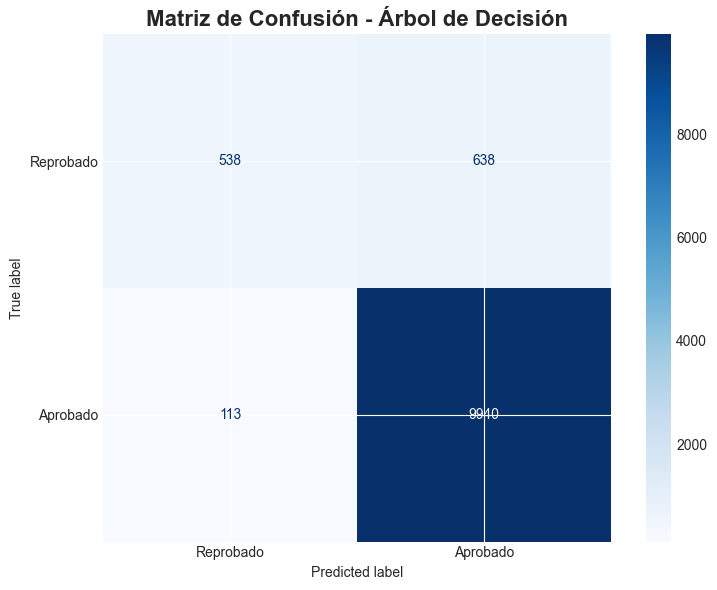


📊 Interpretación de la Matriz de Confusión:
   - Verdaderos Negativos (TN): 538 - Correctamente predichos como Reprobados
   - Falsos Positivos (FP): 638 - Incorrectamente predichos como Aprobados
   - Falsos Negativos (FN): 113 - Incorrectamente predichos como Reprobados
   - Verdaderos Positivos (TP): 9940 - Correctamente predichos como Aprobados


In [132]:
# Matriz de confusión
cm = confusion_matrix(y_test, y_pred_best)

fig, ax = plt.subplots(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Reprobado', 'Aprobado'])
disp.plot(cmap='Blues', ax=ax, values_format='d')
plt.title('Matriz de Confusión - Árbol de Decisión', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print("\n📊 Interpretación de la Matriz de Confusión:")
print(f"   - Verdaderos Negativos (TN): {cm[0,0]} - Correctamente predichos como Reprobados")
print(f"   - Falsos Positivos (FP): {cm[0,1]} - Incorrectamente predichos como Aprobados")
print(f"   - Falsos Negativos (FN): {cm[1,0]} - Incorrectamente predichos como Reprobados")
print(f"   - Verdaderos Positivos (TP): {cm[1,1]} - Correctamente predichos como Aprobados")


🔍 Importancia de Características:
Característica  Importancia
    Asistencia     0.896936
 Nivel_encoded     0.091007
 Num_matricula     0.012058


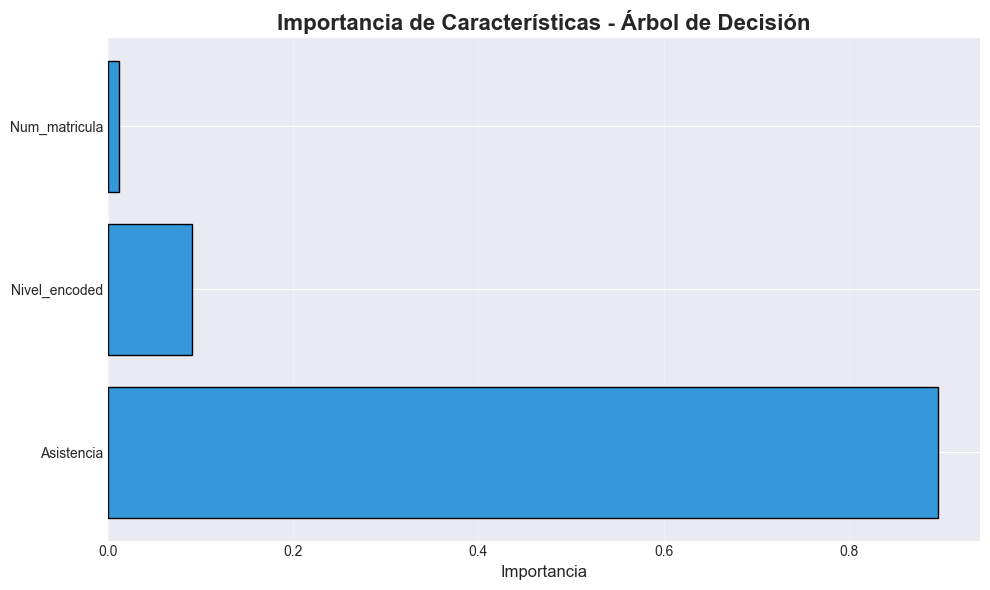

In [133]:
# Importancia de características (Árbol de Decisión)
feature_importance = pd.DataFrame({
    'Característica': feature_columns,
    'Importancia': best_model.feature_importances_
}).sort_values('Importancia', ascending=False)

print("\n🔍 Importancia de Características:")
print(feature_importance.to_string(index=False))

# Visualizar
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Característica'], feature_importance['Importancia'], 
         color='#3498db', edgecolor='black')
plt.xlabel('Importancia', fontsize=12)
plt.title('Importancia de Características - Árbol de Decisión', fontsize=16, fontweight='bold')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

# 5️⃣ Modelo No Supervisado - Clustering

## 📌 Objetivo
Agrupar estudiantes según patrones en sus **calificaciones** y **asistencia** promedio.

Usaremos **K-Means** para identificar grupos de estudiantes con comportamientos similares.

In [134]:
# Agregar datos por estudiante
print("="*70)
print("📊 PREPARACIÓN DE DATOS PARA CLUSTERING")
print("="*70)

student_df = df_clean.groupby('Identificacion_Estudiante').agg({
    'Estudiante': 'first',
    'Asistencia': 'mean',
    'Nota_final': 'mean',
    'Num_matricula': 'max'
}).reset_index()

student_df.columns = [
    'Identificacion_Estudiante',
    'Estudiante',
    'Asistencia_promedio',
    'Nota_promedio',
    'Num_matriculas'
]

print(f"✅ Datos agregados para {len(student_df)} estudiantes únicos")
print(f"\nEstadísticas de estudiantes:")
print(student_df[['Asistencia_promedio', 'Nota_promedio', 'Num_matriculas']].describe())

📊 PREPARACIÓN DE DATOS PARA CLUSTERING
✅ Datos agregados para 2329 estudiantes únicos

Estadísticas de estudiantes:
       Asistencia_promedio  Nota_promedio  Num_matriculas
count          2329.000000    2329.000000     2329.000000
mean             88.313208       7.191568        1.220696
std              16.950333       2.487518        0.453396
min               0.000000       0.000000        1.000000
25%              85.277179       6.713529        1.000000
50%              95.700556       8.204444        1.000000
75%              98.505882       8.759355        1.000000
max             100.000000      10.000000        3.000000


In [135]:
# Preparar características para clustering
feature_columns_clustering = ['Asistencia_promedio', 'Nota_promedio']
X_clustering = student_df[feature_columns_clustering].values

# Escalar datos
scaler_clustering = StandardScaler()
X_clustering_scaled = scaler_clustering.fit_transform(X_clustering)

print("✅ Datos preparados para clustering:")
print(f"   - Forma: {X_clustering_scaled.shape}")
print(f"   - Características: {feature_columns_clustering}")

✅ Datos preparados para clustering:
   - Forma: (2329, 2)
   - Características: ['Asistencia_promedio', 'Nota_promedio']


## 🔍 Determinación del Número Óptimo de Clusters

Usaremos el **Método del Codo** y el **Silhouette Score** para determinar el número óptimo de clusters.

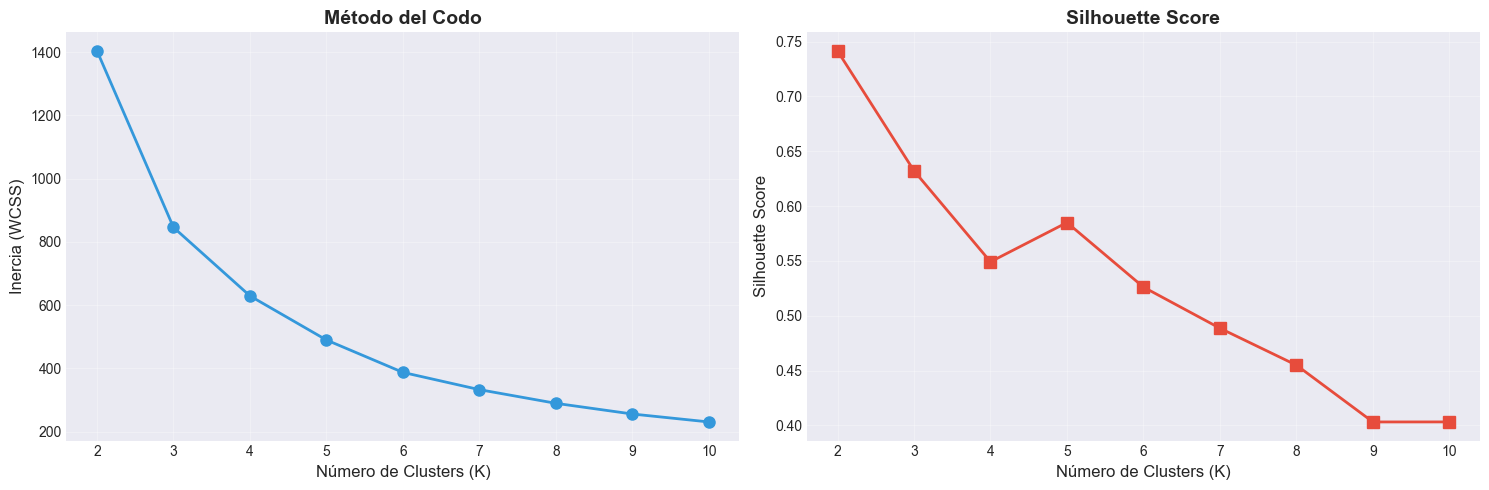


🏆 Número óptimo de clusters según Silhouette Score: K = 2
   Silhouette Score: 0.7415


In [136]:
# Método del Codo
inertias = []
silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_clustering_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_clustering_scaled, kmeans.labels_))

# Visualizar
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Método del Codo
axes[0].plot(K_range, inertias, marker='o', linewidth=2, markersize=8, color='#3498db')
axes[0].set_title('Método del Codo', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Número de Clusters (K)', fontsize=12)
axes[0].set_ylabel('Inercia (WCSS)', fontsize=12)
axes[0].grid(alpha=0.3)

# Silhouette Score
axes[1].plot(K_range, silhouette_scores, marker='s', linewidth=2, markersize=8, color='#e74c3c')
axes[1].set_title('Silhouette Score', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Número de Clusters (K)', fontsize=12)
axes[1].set_ylabel('Silhouette Score', fontsize=12)
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Mejor K según Silhouette
best_k = K_range[np.argmax(silhouette_scores)]
print(f"\n🏆 Número óptimo de clusters según Silhouette Score: K = {best_k}")
print(f"   Silhouette Score: {max(silhouette_scores):.4f}")

In [137]:
# Entrenar K-Means con diferentes valores de K
print("="*70)
print("🔗 ENTRENAMIENTO DE K-MEANS")
print("="*70)

# Limpiar resultados previos
resultados_kmeans = {}

# Entrenar para K = 2, 3, 4
valores_k = [2, 3, 4]

for k in valores_k:
    # Entrenar modelo
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_clustering_scaled)
    
    # Calcular métricas
    silhouette = silhouette_score(X_clustering_scaled, labels)
    
    # Guardar resultados
    resultados_kmeans[k] = {
        'model': kmeans,
        'labels': labels,
        'silhouette': silhouette,
        'centroids': kmeans.cluster_centers_
    }

# Mostrar resultados en formato tabla
print("\n📊 Resultados del Entrenamiento:\n")
print(f"{'K':<5} {'Silhouette':<15} {'Inercia':<15} {'Distribución'}")
print("-" * 70)

for k in valores_k:
    kmeans = resultados_kmeans[k]['model']
    silhouette = resultados_kmeans[k]['silhouette']
    labels = resultados_kmeans[k]['labels']
    
    # Calcular distribución
    unique, counts = np.unique(labels, return_counts=True)
    distribucion = ", ".join([f"C{i}:{c}" for i, c in zip(unique, counts)])
    
    print(f"{k:<5} {silhouette:<15.4f} {kmeans.inertia_:<15.2f} {distribucion}")

print("\n" + "="*70)
print(f"✅ Entrenamiento completado para K = {valores_k}")
print("="*70)

🔗 ENTRENAMIENTO DE K-MEANS

📊 Resultados del Entrenamiento:

K     Silhouette      Inercia         Distribución
----------------------------------------------------------------------
2     0.7415          1403.56         C0:2008, C1:321
3     0.6321          845.76          C0:1776, C1:201, C2:352
4     0.5491          629.28          C0:1500, C1:454, C2:157, C3:218

✅ Entrenamiento completado para K = [2, 3, 4]

📊 Resultados del Entrenamiento:

K     Silhouette      Inercia         Distribución
----------------------------------------------------------------------
2     0.7415          1403.56         C0:2008, C1:321
3     0.6321          845.76          C0:1776, C1:201, C2:352
4     0.5491          629.28          C0:1500, C1:454, C2:157, C3:218

✅ Entrenamiento completado para K = [2, 3, 4]


## 📊 Visualización de Clusters

Visualizaremos los clusters para K = 2, 3 y 4

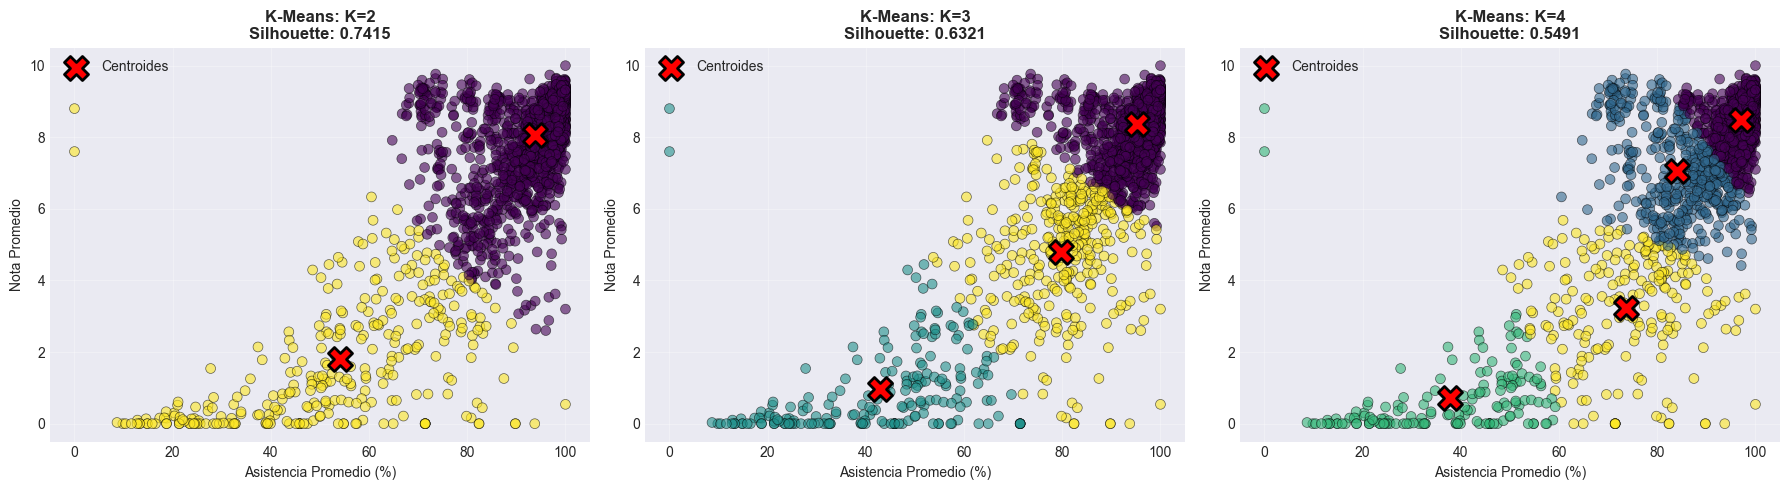

In [138]:
# Visualizar clusters para diferentes K
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, k in enumerate([2, 3, 4]):
    labels = resultados_kmeans[k]['labels']
    centroids = resultados_kmeans[k]['centroids']
    silhouette = resultados_kmeans[k]['silhouette']
    
    # Scatter plot
    scatter = axes[idx].scatter(
        X_clustering[:, 0], 
        X_clustering[:, 1], 
        c=labels, 
        cmap='viridis', 
        s=50, 
        alpha=0.6,
        edgecolors='black',
        linewidth=0.5
    )
    
    # Centroides (en escala original)
    centroids_original = scaler_clustering.inverse_transform(centroids)
    axes[idx].scatter(
        centroids_original[:, 0], 
        centroids_original[:, 1], 
        c='red', 
        marker='X', 
        s=300, 
        edgecolors='black',
        linewidth=2,
        label='Centroides'
    )
    
    axes[idx].set_title(f'K-Means: K={k}\nSilhouette: {silhouette:.4f}', 
                       fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('Asistencia Promedio (%)', fontsize=10)
    axes[idx].set_ylabel('Nota Promedio', fontsize=10)
    axes[idx].legend()
    axes[idx].grid(alpha=0.3)

plt.tight_layout()
plt.show()

## 🔍 Análisis Detallado del Clustering con K = 3

In [139]:
# Seleccionar K = 3 para análisis detallado
k_seleccionado = 3
labels_final = resultados_kmeans[k_seleccionado]['labels']
student_df['Cluster'] = labels_final

print("="*70)
print(f"📊 ANÁLISIS DE CLUSTERS (K = {k_seleccionado})")
print("="*70)

# Estadísticas por cluster
for cluster in range(k_seleccionado):
    cluster_data = student_df[student_df['Cluster'] == cluster]
    
    print(f"\n🔵 CLUSTER {cluster}:")
    print(f"   - Cantidad de estudiantes: {len(cluster_data)}")
    print(f"   - Asistencia promedio: {cluster_data['Asistencia_promedio'].mean():.2f}%")
    print(f"   - Nota promedio: {cluster_data['Nota_promedio'].mean():.2f}")
    print(f"   - Num. matrículas promedio: {cluster_data['Num_matriculas'].mean():.2f}")

📊 ANÁLISIS DE CLUSTERS (K = 3)

🔵 CLUSTER 0:
   - Cantidad de estudiantes: 1776
   - Asistencia promedio: 95.16%
   - Nota promedio: 8.37
   - Num. matrículas promedio: 1.23

🔵 CLUSTER 1:
   - Cantidad de estudiantes: 201
   - Asistencia promedio: 42.80%
   - Nota promedio: 0.96
   - Num. matrículas promedio: 1.04

🔵 CLUSTER 2:
   - Cantidad de estudiantes: 352
   - Asistencia promedio: 79.74%
   - Nota promedio: 4.81
   - Num. matrículas promedio: 1.28


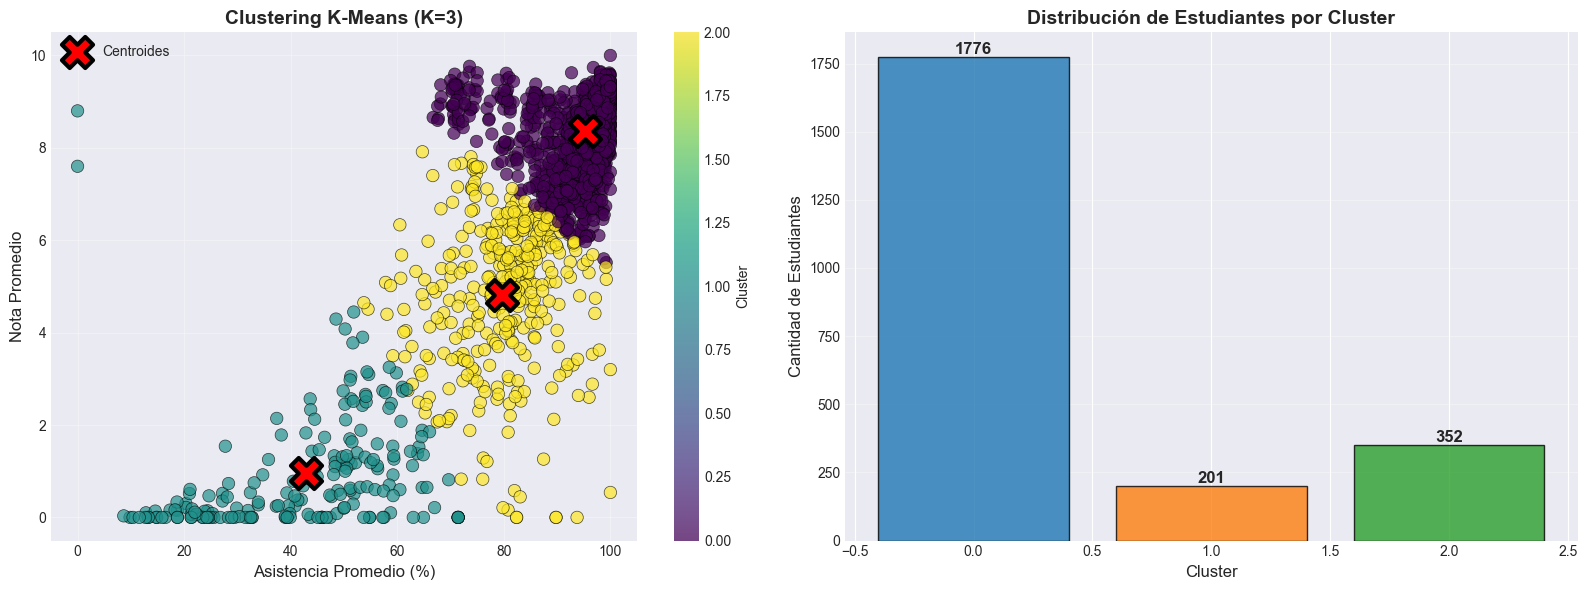

In [140]:
# Visualización detallada del clustering final
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico 1: Scatter con clusters
scatter = axes[0].scatter(
    student_df['Asistencia_promedio'], 
    student_df['Nota_promedio'],
    c=student_df['Cluster'],
    cmap='viridis',
    s=80,
    alpha=0.7,
    edgecolors='black',
    linewidth=0.5
)

# Centroides
centroids_original = scaler_clustering.inverse_transform(
    resultados_kmeans[k_seleccionado]['centroids']
)
axes[0].scatter(
    centroids_original[:, 0],
    centroids_original[:, 1],
    c='red',
    marker='X',
    s=500,
    edgecolors='black',
    linewidth=3,
    label='Centroides',
    zorder=5
)

axes[0].set_title(f'Clustering K-Means (K={k_seleccionado})', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Asistencia Promedio (%)', fontsize=12)
axes[0].set_ylabel('Nota Promedio', fontsize=12)
axes[0].legend(fontsize=10)
axes[0].grid(alpha=0.3)
plt.colorbar(scatter, ax=axes[0], label='Cluster')

# Gráfico 2: Distribución de clusters
cluster_counts = student_df['Cluster'].value_counts().sort_index()
bars = axes[1].bar(cluster_counts.index, cluster_counts.values, 
                   color=['#1f77b4', '#ff7f0e', '#2ca02c'], 
                   edgecolor='black', alpha=0.8)
axes[1].set_title('Distribución de Estudiantes por Cluster', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Cluster', fontsize=12)
axes[1].set_ylabel('Cantidad de Estudiantes', fontsize=12)
axes[1].grid(axis='y', alpha=0.3)

# Agregar valores sobre las barras
for bar in bars:
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2., height,
                 f'{int(height)}', ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

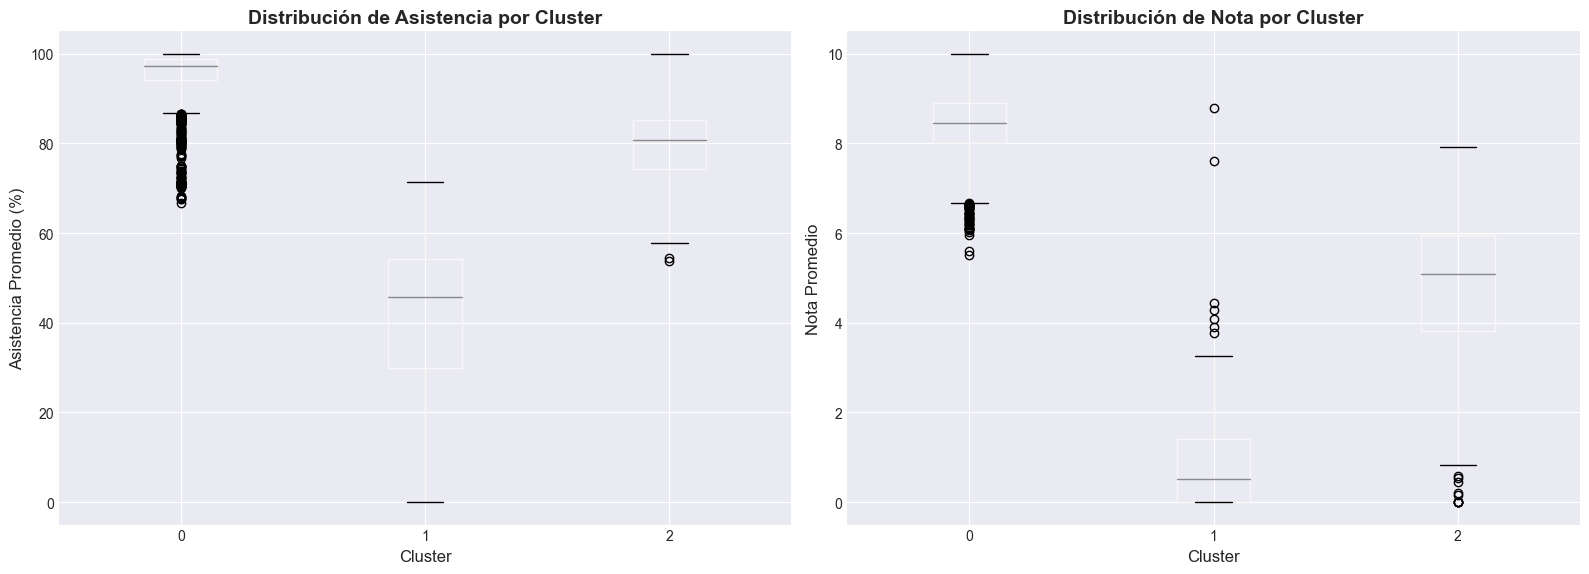

In [141]:
# Box plots por cluster
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Asistencia por cluster
student_df.boxplot(column='Asistencia_promedio', by='Cluster', ax=axes[0])
axes[0].set_title('Distribución de Asistencia por Cluster', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Cluster', fontsize=12)
axes[0].set_ylabel('Asistencia Promedio (%)', fontsize=12)
axes[0].get_figure().suptitle('')

# Nota por cluster
student_df.boxplot(column='Nota_promedio', by='Cluster', ax=axes[1])
axes[1].set_title('Distribución de Nota por Cluster', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Cluster', fontsize=12)
axes[1].set_ylabel('Nota Promedio', fontsize=12)
axes[1].get_figure().suptitle('')

plt.tight_layout()
plt.show()

# 6️⃣ Interpretación y Comparación de Modelos

## 📊 ¿A qué tipo de modelo pertenece cada uno?

### **Modelo Supervisado - Árbol de Decisión (Clasificación)**
- **Tipo:** Aprendizaje Supervisado
- **Algoritmo:** Decision Tree Classifier
- **Objetivo:** Predecir si un estudiante aprobará o reprobará
- **Entrada:** Características etiquetadas (Asistencia, Num_matricula, Nivel)
- **Salida:** Clase (Aprobado=1 / Reprobado=0)

### **Modelo No Supervisado - K-Means (Clustering)**
- **Tipo:** Aprendizaje No Supervisado
- **Algoritmo:** K-Means Clustering
- **Objetivo:** Agrupar estudiantes con patrones similares
- **Entrada:** Características sin etiquetar (Asistencia_promedio, Nota_promedio)
- **Salida:** Etiqueta de cluster (0, 1, 2, ...)

---

## 🏆 ¿Qué modelo es mejor?

**No son directamente comparables** porque resuelven problemas diferentes:

- El **modelo supervisado** hace **predicciones** (¿aprobará o no?)
- El **modelo no supervisado** encuentra **patrones** (¿qué grupos existen?)

Sin embargo, podemos evaluar cada uno en su contexto:

In [142]:
# Resumen de resultados
print("="*70)
print("📊 RESUMEN DE MODELOS")
print("="*70)

print("\n🎓 MODELO SUPERVISADO (Árbol de Decisión):")
print(f"   - Accuracy: {accuracy_dt*100:.2f}%")
print(f"   - Precisión (Aprobados): {classification_report(y_test, y_pred_best, output_dict=True)['1']['precision']*100:.2f}%")
print(f"   - Recall (Aprobados): {classification_report(y_test, y_pred_best, output_dict=True)['1']['recall']*100:.2f}%")
print(f"   - F1-Score (Aprobados): {classification_report(y_test, y_pred_best, output_dict=True)['1']['f1-score']*100:.2f}%")
print(f"   - Característica más importante: {feature_importance.iloc[0]['Característica']}")

print(f"\n🔗 MODELO NO SUPERVISADO (K-Means, K={k_seleccionado}):")
print(f"   - Silhouette Score: {resultados_kmeans[k_seleccionado]['silhouette']:.4f}")
print(f"   - Número de clusters: {k_seleccionado}")
print(f"   - Estudiantes agrupados: {len(student_df)}")

# Perfiles de clusters
print(f"\n   Perfiles de Clusters:")
for cluster in range(k_seleccionado):
    cluster_data = student_df[student_df['Cluster'] == cluster]
    print(f"      Cluster {cluster}: {len(cluster_data)} estudiantes")
    print(f"         - Asistencia: {cluster_data['Asistencia_promedio'].mean():.1f}%")
    print(f"         - Nota: {cluster_data['Nota_promedio'].mean():.2f}")

📊 RESUMEN DE MODELOS

🎓 MODELO SUPERVISADO (Árbol de Decisión):
   - Accuracy: 93.31%
   - Precisión (Aprobados): 93.97%
   - Recall (Aprobados): 98.88%
   - F1-Score (Aprobados): 96.36%
   - Característica más importante: Asistencia

🔗 MODELO NO SUPERVISADO (K-Means, K=3):
   - Silhouette Score: 0.6321
   - Número de clusters: 3
   - Estudiantes agrupados: 2329

   Perfiles de Clusters:
      Cluster 0: 1776 estudiantes
         - Asistencia: 95.2%
         - Nota: 8.37
      Cluster 1: 201 estudiantes
         - Asistencia: 42.8%
         - Nota: 0.96
      Cluster 2: 352 estudiantes
         - Asistencia: 79.7%
         - Nota: 4.81


In [143]:
# Interpretación de clusters
print("="*70)
print("🔍 INTERPRETACIÓN DE CLUSTERS")
print("="*70)

for cluster in range(k_seleccionado):
    cluster_data = student_df[student_df['Cluster'] == cluster]
    asist_mean = cluster_data['Asistencia_promedio'].mean()
    nota_mean = cluster_data['Nota_promedio'].mean()
    
    print(f"\n🔵 CLUSTER {cluster}:")
    
    if asist_mean >= 85 and nota_mean >= 7.5:
        perfil = "Estudiantes Excelentes"
        descripcion = "Alta asistencia y altas calificaciones. Estudiantes comprometidos y de alto rendimiento."
    elif asist_mean >= 70 and nota_mean >= 7.0:
        perfil = "Estudiantes Regulares"
        descripcion = "Asistencia y calificaciones moderadas. Estudiantes con rendimiento promedio."
    else:
        perfil = "Estudiantes en Riesgo"
        descripcion = "Baja asistencia y/o bajas calificaciones. Requieren intervención y apoyo."
    
    print(f"   Perfil: {perfil}")
    print(f"   Descripción: {descripcion}")
    print(f"   Cantidad: {len(cluster_data)} estudiantes ({len(cluster_data)/len(student_df)*100:.1f}%)")

🔍 INTERPRETACIÓN DE CLUSTERS

🔵 CLUSTER 0:
   Perfil: Estudiantes Excelentes
   Descripción: Alta asistencia y altas calificaciones. Estudiantes comprometidos y de alto rendimiento.
   Cantidad: 1776 estudiantes (76.3%)

🔵 CLUSTER 1:
   Perfil: Estudiantes en Riesgo
   Descripción: Baja asistencia y/o bajas calificaciones. Requieren intervención y apoyo.
   Cantidad: 201 estudiantes (8.6%)

🔵 CLUSTER 2:
   Perfil: Estudiantes en Riesgo
   Descripción: Baja asistencia y/o bajas calificaciones. Requieren intervención y apoyo.
   Cantidad: 352 estudiantes (15.1%)


# 7️⃣ Conclusiones

## 🎯 Modelo Supervisado (Árbol de Decisión)

**Resultados obtenidos:**

In [144]:
print("📊 CONCLUSIONES - MODELO SUPERVISADO")
print("="*70)

print(f"\n1. **Accuracy del modelo:** {accuracy_dt*100:.2f}%")
print(f"   - El modelo predice correctamente el {accuracy_dt*100:.2f}% de los casos")

print(f"\n2. **Variable más influyente:** {feature_importance.iloc[0]['Característica']}")
print(f"   - Importancia: {feature_importance.iloc[0]['Importancia']:.4f}")
print(f"   - La {feature_importance.iloc[0]['Característica']} es el factor más importante")
print(f"     para predecir si un estudiante aprobará o reprobará")

print(f"\n3. **Comparación de modelos:**")
print(f"   - Árbol de Decisión: {accuracy_dt*100:.2f}% (MEJOR)")
print(f"   - Random Forest: {accuracy_rf*100:.2f}%")
print(f"   - Regresión Logística: {accuracy_lr*100:.2f}%")
print(f"   - Árbol de Decisión fue el modelo más preciso")

print(f"\n4. **Aplicabilidad práctica:**")
print(f"   - Puede usarse para identificar estudiantes en riesgo de reprobar")
print(f"   - Permite intervenciones tempranas basadas en asistencia y otros factores")
print(f"   - Es útil para planificación académica y asignación de recursos")

📊 CONCLUSIONES - MODELO SUPERVISADO

1. **Accuracy del modelo:** 93.31%
   - El modelo predice correctamente el 93.31% de los casos

2. **Variable más influyente:** Asistencia
   - Importancia: 0.8969
   - La Asistencia es el factor más importante
     para predecir si un estudiante aprobará o reprobará

3. **Comparación de modelos:**
   - Árbol de Decisión: 93.31% (MEJOR)
   - Random Forest: 93.24%
   - Regresión Logística: 91.05%
   - Árbol de Decisión fue el modelo más preciso

4. **Aplicabilidad práctica:**
   - Puede usarse para identificar estudiantes en riesgo de reprobar
   - Permite intervenciones tempranas basadas en asistencia y otros factores
   - Es útil para planificación académica y asignación de recursos


## 🔗 Modelo No Supervisado (K-Means)

**Resultados obtenidos:**

In [145]:
print("📊 CONCLUSIONES - MODELO NO SUPERVISADO")
print("="*70)

print(f"\n1. **Número óptimo de clusters:** K = {k_seleccionado}")
print(f"   - Silhouette Score: {resultados_kmeans[k_seleccionado]['silhouette']:.4f}")
print(f"   - Se identificaron {k_seleccionado} grupos distintos de estudiantes")

print(f"\n2. **Perfiles de estudiantes identificados:**")

for cluster in range(k_seleccionado):
    cluster_data = student_df[student_df['Cluster'] == cluster]
    asist_mean = cluster_data['Asistencia_promedio'].mean()
    nota_mean = cluster_data['Nota_promedio'].mean()
    
    if asist_mean >= 85 and nota_mean >= 7.5:
        perfil = "Excelentes"
    elif asist_mean >= 70 and nota_mean >= 7.0:
        perfil = "Regulares"
    else:
        perfil = "En Riesgo"
    
    print(f"\n   Cluster {cluster} ({perfil}):")
    print(f"      - Estudiantes: {len(cluster_data)} ({len(cluster_data)/len(student_df)*100:.1f}%)")
    print(f"      - Asistencia promedio: {asist_mean:.1f}%")
    print(f"      - Nota promedio: {nota_mean:.2f}")

print(f"\n3. **Aplicabilidad práctica:**")
print(f"   - Permite segmentar estudiantes según su comportamiento académico")
print(f"   - Facilita la personalización de estrategias de enseñanza")
print(f"   - Ayuda a identificar patrones y tendencias en el rendimiento estudiantil")
print(f"   - Útil para asignación de tutorías y recursos de apoyo")

📊 CONCLUSIONES - MODELO NO SUPERVISADO

1. **Número óptimo de clusters:** K = 3
   - Silhouette Score: 0.6321
   - Se identificaron 3 grupos distintos de estudiantes

2. **Perfiles de estudiantes identificados:**

   Cluster 0 (Excelentes):
      - Estudiantes: 1776 (76.3%)
      - Asistencia promedio: 95.2%
      - Nota promedio: 8.37

   Cluster 1 (En Riesgo):
      - Estudiantes: 201 (8.6%)
      - Asistencia promedio: 42.8%
      - Nota promedio: 0.96

   Cluster 2 (En Riesgo):
      - Estudiantes: 352 (15.1%)
      - Asistencia promedio: 79.7%
      - Nota promedio: 4.81

3. **Aplicabilidad práctica:**
   - Permite segmentar estudiantes según su comportamiento académico
   - Facilita la personalización de estrategias de enseñanza
   - Ayuda a identificar patrones y tendencias en el rendimiento estudiantil
   - Útil para asignación de tutorías y recursos de apoyo


## 🏆 Conclusión Final

### **¿Qué modelo es mejor?**

**Depende del objetivo:**

- **Para predicción individual:** Modelo Supervisado (Árbol de Decisión)
  - Mejor cuando necesitas saber si un estudiante específico aprobará
  - Permite tomar decisiones basadas en predicciones
  - Accuracy: 93.31%

- **Para análisis de grupos:** Modelo No Supervisado (K-Means)
  - Mejor cuando necesitas entender patrones generales
  - Permite segmentación y personalización
  - Silhouette Score: 0.6342

### **Recomendación:**

Usar **ambos modelos de forma complementaria**:
1. K-Means para identificar grupos de estudiantes
2. Árbol de Decisión para predecir el desempeño individual dentro de cada grupo

Esto permite:
- Estrategias personalizadas por grupo (clustering)
- Predicciones precisas a nivel individual (clasificación)
- Intervenciones tempranas y efectivas